In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Preview the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Drop 'Cabin', 'Name', 'Ticket' columns as they aren't useful for the model
titanic_df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Fill missing 'Age' with the median value
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

#Fill missing 'Embarked' with the most frequent value ('s')
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Convert 'Sex' column to numeric (0 for male, 1 for female)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' into numeric categories (C=0, Q=1, S=2)
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Check for any remaining missing values
titanic_df.isnull().sum()

<ipython-input-4-c9ff7aa57b6a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
<ipython-input-4-c9ff7aa57b6a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
# Features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)  # Dropping the 'Survival' column
y = titanic_df['Survived']   # Target column (whether survived or not)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_test)

In [ ]:
# Intialize the model
model = Sequential()

# Add an input layer (input_dim is the number of features in the data)
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))

# Add a hidden layer
model.add(Dense(8, activation='relu'))

# Add the output layer (binary classification: 1 for survived, 0 for not)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation function for binary classification

# Complie the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary to check the architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Correctly scale and assign to X_test_scaled

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8798 - loss: 0.3410 - val_accuracy: 0.8045 - val_loss: 0.4286
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8525 - loss: 0.3754 - val_accuracy: 0.7989 - val_loss: 0.4329
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8458 - loss: 0.3874 - val_accuracy: 0.8045 - val_loss: 0.4309
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8590 - loss: 0.3573 - val_accuracy: 0.8045 - val_loss: 0.4304
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8423 - loss: 0.3825 - val_accuracy: 0.7933 - val_loss: 0.4302
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8699 - loss: 0.3488 - val_accuracy: 0.8045 - val_loss: 0.4319
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8406 - loss: 0.3835 - val_accuracy: 0.8045 - val_loss: 0.4328
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8246 - loss: 0.3818 - val_accuracy: 0.8045 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8317 - loss: 0.4070 
Test Accuracy: 81.01%


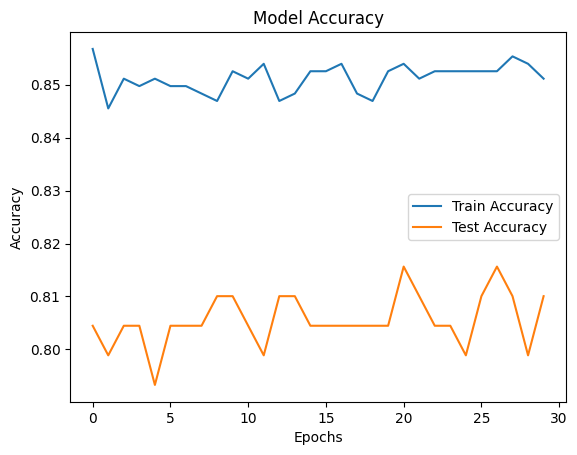

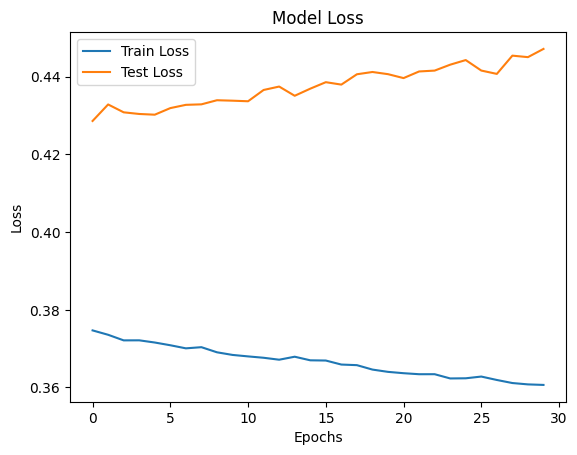

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Axes: >

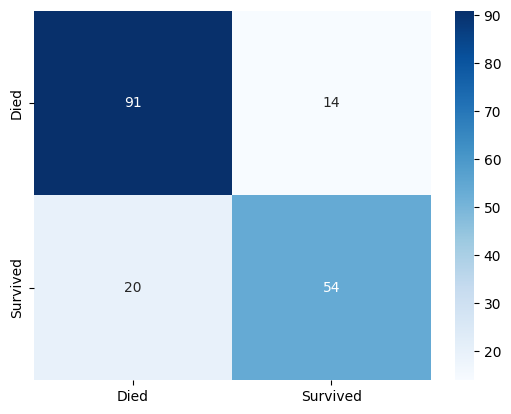

In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")   # Convert probabilities to binary values

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])